In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [3]:
#Use grep to select the rows from larger dataset that have the procedure code(CPT4) of interest
caesarian_df

,Claim_Line_No,Place_of_Service_Cd,Rev_Cd,CPT4_ID,CPT4_Mod1_Cd,CPT4_Mod2_Cd,CPT4_Mod3_Cd,CPT4_Mod4_Cd,Service_Start_Dt,Units,...,NDC_Cd,Capitation_Flag,ER_Flag,Copay_Amt,Coinsurance_Amt,Deductible_Amt,Dental_Flag,Unit_Of_Measure_Cd,Unit_Of_Measure_Desc,Service_Start_Year
Claim_ID,,,,,,,,,,,,,,,,,,,,,
340993570,1,21,NaN,59510,,,,,2016-07-29,1,...,0,N,N,0.0,715.54,715.54,N,UN,Units,2016
350588632,1,21,NaN,59510,,,,,2016-06-27,1,...,0,N,N,0.0,641.99,0.00,N,UN,Units,2016
357047267,1,21,NaN,59510,UC,,,,2016-10-17,1,...,0,Y,N,0.0,0.00,0.00,N,UN,Units,2016
340423363,1,21,NaN,59510,,,,,2016-02-21,1,...,0,N,N,0.0,0.00,0.00,N,UN,Units,2016
171159994,1,21,NaN,59510,,,,,2016-02-05,1,...,0,N,N,0.0,295.52,0.00,N,UN,Units,2016
171159994,2,21,NaN,59510,,,,,2016-02-05,1,...,0,N,N,0.0,0.00,0.00,N,UN,Units,2016
171159510,1,22,NaN,G0202,26,,,,2016-02-03,1,...,0,N,N,0.0,0.00,0.00,N,UN,Units,2016
171159510,2,22,NaN,77052,26,,,,2016-02-03,1,...,0,N,N,0.0,0.00,0.00,N,UN,Units,2016
171175684,1,21,NaN,59510,,,,,2016-01-31,1,...,0,N,N,0.0,277.24,0.00,N,UN,Units,2016


In [4]:
list(caesarian_df.columns.values)

['Claim_Line_No',
 'Place_of_Service_Cd',
 'Rev_Cd',
 'CPT4_ID',
 'CPT4_Mod1_Cd',
 'CPT4_Mod2_Cd',
 'CPT4_Mod3_Cd',
 'CPT4_Mod4_Cd',
 'Service_Start_Dt',
 'Units',
 'Charge_Amt',
 'Prepaid_Amt',
 'Plan_Paid_Amt',
 'NDC_Cd',
 'Capitation_Flag',
 'ER_Flag',
 'Copay_Amt',
 'Coinsurance_Amt',
 'Deductible_Amt',
 'Dental_Flag',
 'Unit_Of_Measure_Cd',
 'Unit_Of_Measure_Desc',
 'Service_Start_Year']

In [5]:
#if there's time, add this?
caesarian_df.CPT4_Mod1_Cd.unique()

array(['  ', 'UC', '26', '22', 'CC', 'RR', '25', '59', '80', 'SL', 'TC',
       'Q5', '81', 'PO', 'UD', 'GP', 'GO', 'GY', 'U6', '52', 'CG', 'AT',
       '51', 'LT', 'P1', 'UB', 'T5', 'XE', 'TE', 'RT', 'RA', 'AG', 'AS',
       'F4', '8P', '90', 'QW', 'NU', 'KX', 'XU', 'GZ', 'U8', 'AA', 'GC'],
      dtype=object)

In [6]:
caesarian_df.groupby('CPT4_Mod1_Cd').size()

CPT4_Mod1_Cd
      6632
22     164
25      46
26      25
51       1
52       6
59      22
80       2
81       1
8P       1
90       5
AA       1
AG       1
AS       1
AT       2
CC      15
CG       2
F4       1
GC      10
GO       4
GP      16
GY       9
GZ       2
KX       1
LT       9
NU       7
P1       1
PO       8
Q5       4
QW      11
RA       1
RR      10
RT      10
SL      32
T5       1
TC       8
TE       6
U6       2
U8       2
UB       3
UC     544
UD      13
XE       1
XU       2
dtype: int64

In [7]:
#add this too?
caesarian_df.groupby('CPT4_Mod2_Cd').size()

CPT4_Mod2_Cd
      7594
22       1
CC      15
CI       6
GY       2
KI       1
KX       4
LT       4
PO       2
RT       1
TC       3
UC      12
dtype: int64

In [8]:
caesarian_df.CPT4_Mod2_Cd.unique()

array(['  ', 'UC', 'RT', 'PO', 'KX', 'CC', 'CI', 'GY', 'LT', 'TC', 'KI',
       '22'], dtype=object)

In [9]:
#unneccessary
caesarian_df.CPT4_Mod3_Cd.unique()

array(['  '], dtype=object)

In [10]:
#unneccessary too
caesarian_df.CPT4_Mod4_Cd.unique()

array(['  '], dtype=object)

In [11]:
#create new dataframe without claims that have '59510' in their claim number which aren't the right procedure  
caesarian_df2 = caesarian_df[caesarian_df['CPT4_ID'] == ('59510')]
caesarian_df2

,Claim_Line_No,Place_of_Service_Cd,Rev_Cd,CPT4_ID,CPT4_Mod1_Cd,CPT4_Mod2_Cd,CPT4_Mod3_Cd,CPT4_Mod4_Cd,Service_Start_Dt,Units,...,NDC_Cd,Capitation_Flag,ER_Flag,Copay_Amt,Coinsurance_Amt,Deductible_Amt,Dental_Flag,Unit_Of_Measure_Cd,Unit_Of_Measure_Desc,Service_Start_Year
Claim_ID,,,,,,,,,,,,,,,,,,,,,
340993570,1,21,NaN,59510,,,,,2016-07-29,1,...,0,N,N,0.0,715.54,715.54,N,UN,Units,2016
350588632,1,21,NaN,59510,,,,,2016-06-27,1,...,0,N,N,0.0,641.99,0.00,N,UN,Units,2016
357047267,1,21,NaN,59510,UC,,,,2016-10-17,1,...,0,Y,N,0.0,0.00,0.00,N,UN,Units,2016
340423363,1,21,NaN,59510,,,,,2016-02-21,1,...,0,N,N,0.0,0.00,0.00,N,UN,Units,2016
171159994,1,21,NaN,59510,,,,,2016-02-05,1,...,0,N,N,0.0,295.52,0.00,N,UN,Units,2016
171159994,2,21,NaN,59510,,,,,2016-02-05,1,...,0,N,N,0.0,0.00,0.00,N,UN,Units,2016
171175684,1,21,NaN,59510,,,,,2016-01-31,1,...,0,N,N,0.0,277.24,0.00,N,UN,Units,2016
171175684,2,21,NaN,59510,,,,,2016-01-31,1,...,0,N,N,0.0,0.00,0.00,N,UN,Units,2016
171157745,1,99,NaN,59510,,,,,2016-02-08,1,...,0,N,N,0.0,0.00,0.00,N,UN,Units,2016


In [12]:
#Remove Columns that are redundant (i.e. descriptive of another column in the table) or contain only one value
edited_caesarian_df = caesarian_df2.drop(['Claim_Line_No','Dental_Flag', 'Units', 'Rev_Cd', 'NDC_Cd', 'ER_Flag', 'Service_Start_Year', 'Unit_Of_Measure_Desc', 'Unit_Of_Measure_Cd'], axis=1)
edited_caesarian_df

,Place_of_Service_Cd,CPT4_ID,CPT4_Mod1_Cd,CPT4_Mod2_Cd,CPT4_Mod3_Cd,CPT4_Mod4_Cd,Service_Start_Dt,Charge_Amt,Prepaid_Amt,Plan_Paid_Amt,Capitation_Flag,Copay_Amt,Coinsurance_Amt,Deductible_Amt
Claim_ID,,,,,,,,,,,,,,
340993570,21,59510,,,,,2016-07-29,3350.00,0.00,1669.58,N,0.0,715.54,715.54
350588632,21,59510,,,,,2016-06-27,3500.00,0.00,688.25,N,0.0,641.99,0.00
357047267,21,59510,UC,,,,2016-10-17,3586.00,0.00,2029.14,Y,0.0,0.00,0.00
340423363,21,59510,,,,,2016-02-21,3800.00,1932.28,96.22,N,0.0,0.00,0.00
171159994,21,59510,,,,,2016-02-05,2689.03,0.00,1182.07,N,0.0,295.52,0.00
171159994,21,59510,,,,,2016-02-05,1160.97,0.00,1160.97,N,0.0,0.00,0.00
171175684,21,59510,,,,,2016-01-31,2710.84,0.00,1108.96,N,0.0,277.24,0.00
171175684,21,59510,,,,,2016-01-31,1089.16,0.00,1089.16,N,0.0,0.00,0.00
171157745,99,59510,,,,,2016-02-08,3850.00,0.00,2638.56,N,0.0,0.00,0.00


In [13]:
#There are very few rows (<30 out of a DataFrame with 6200+ rows) with CPT4 modifications. For the first model, drop them to simplify the process
simplified_CPT4_df = edited_caesarian_df.drop(['CPT4_Mod1_Cd', 'CPT4_Mod2_Cd', 'CPT4_Mod3_Cd', 'CPT4_Mod4_Cd'], axis=1)
simplified_CPT4_df


,Place_of_Service_Cd,CPT4_ID,Service_Start_Dt,Charge_Amt,Prepaid_Amt,Plan_Paid_Amt,Capitation_Flag,Copay_Amt,Coinsurance_Amt,Deductible_Amt
Claim_ID,,,,,,,,,,
340993570,21,59510,2016-07-29,3350.00,0.00,1669.58,N,0.0,715.54,715.54
350588632,21,59510,2016-06-27,3500.00,0.00,688.25,N,0.0,641.99,0.00
357047267,21,59510,2016-10-17,3586.00,0.00,2029.14,Y,0.0,0.00,0.00
340423363,21,59510,2016-02-21,3800.00,1932.28,96.22,N,0.0,0.00,0.00
171159994,21,59510,2016-02-05,2689.03,0.00,1182.07,N,0.0,295.52,0.00
171159994,21,59510,2016-02-05,1160.97,0.00,1160.97,N,0.0,0.00,0.00
171175684,21,59510,2016-01-31,2710.84,0.00,1108.96,N,0.0,277.24,0.00
171175684,21,59510,2016-01-31,1089.16,0.00,1089.16,N,0.0,0.00,0.00
171157745,99,59510,2016-02-08,3850.00,0.00,2638.56,N,0.0,0.00,0.00


## Filter Claims Header file


In [14]:
claims_of_interest = set(simplified_CPT4_df.index.astype(str))
claims_of_interest

{'263361237',
 '309994348',
 '181707558',
 '280324326',
 '171409750',
 '278154461',
 '178261213',
 '161119048',
 '280272042',
 '306738410',
 '263199510',
 '279247359',
 '238904899',
 '279614286',
 '179454272',
 '282534174',
 '283360821',
 '239184553',
 '249696356',
 '282850442',
 '239340665',
 '340445323',
 '249695582',
 '248424964',
 '340493727',
 '279698287',
 '186418914',
 '279065062',
 '171501737',
 '340782608',
 '142534836',
 '310115195',
 '278155311',
 '148343770',
 '281199278',
 '310291569',
 '281693713',
 '310232404',
 '281015296',
 '263121389',
 '282076126',
 '262871075',
 '148531646',
 '186259869',
 '283136310',
 '279313202',
 '282969807',
 '263650813',
 '186442619',
 '309999664',
 '280244517',
 '340448749',
 '279732740',
 '238150361',
 '163001641',
 '188742648',
 '278950848',
 '238864104',
 '188690238',
 '309861627',
 '279200797',
 '282258248',
 '278699243',
 '186472083',
 '171327698',
 '171359111',
 '282169790',
 '248410988',
 '319642681',
 '282069413',
 '321186076',
 '2820

In [15]:
with open("Claim_Medical_Header.csv") as file:
    with open("caesarian_claims.csv", "w") as output:
        #use with to make sure it automatically gets closed
        for i,line in enumerate(file):
            fields = line.split(",")
            if fields[0] in claims_of_interest:
                output.write(line)

In [16]:
data_from_claims_header = pd.read_csv('caesarian_claims.csv', header=None, index_col=[0])
#by sorting for rows based on whether they're in the previous dataframe or not, we've excluded the column names. 
#they need to be added manually
data_from_claims_header.columns = [
 'Claim_Type_Cd',
 'Claim_Type_Desc',
 'Admit_Type_Cd',
 'Admit_Type_Desc',
 'Admit_Source_Cd',
 'Admit_Source_Desc',
 'Discharge_Status_Cd',
 'Discharge_Status_Desc',
 'Bill_Type_Cd',
 'Third_Party_Liability_Cd',
 'Third_Party_Liability_Desc',
 'E_Cd',
 'Service_Start_Dt',
 'Charge_Amt',
 'Plan_Paid_Amt',
 'Prepaid_Amt',
 'Copay_Amt',
 'Coinsurance_Amt',
 'Line_of_Business_Cd',
 'Capitation_Flag',
 'Admission_Dx_ID',
 'Principal_Dx_ID',
 'Primary_Proc_ID',
 'Member_Age_Years',
 'Length_of_Stay',
 'ER_Flag',
 'Line_Count',
 'Deductible_Amt',
 'Dental_Flag',
 'Service_Start_Year',
 'Small_Area_Cd',
 'Gender_Cd',
 'Member_Gender_Desc']

data_from_claims_header

,Claim_Type_Cd,Claim_Type_Desc,Admit_Type_Cd,Admit_Type_Desc,Admit_Source_Cd,Admit_Source_Desc,Discharge_Status_Cd,Discharge_Status_Desc,Bill_Type_Cd,Third_Party_Liability_Cd,...,Member_Age_Years,Length_of_Stay,ER_Flag,Line_Count,Deductible_Amt,Dental_Flag,Service_Start_Year,Small_Area_Cd,Gender_Cd,Member_Gender_Desc
0,,,,,,,,,,,,,,,,,,,,,
171290596,P,Professional,9,INFORMATION NOT AVAILABLE,9,Information Not Available,0,Unknown,UK,1,...,45,0.0,N,1,0.00,N,2016,56.0,F,Female
238759510,P,Professional,9,INFORMATION NOT AVAILABLE,9,Information Not Available,0,Unknown,UK,1,...,21,0.0,N,1,0.00,N,2016,16.0,F,Female
280709565,P,Professional,9,INFORMATION NOT AVAILABLE,9,Information Not Available,0,Unknown,UK,1,...,32,0.0,N,1,0.00,N,2016,17.0,F,Female
282874855,P,Professional,9,INFORMATION NOT AVAILABLE,9,Information Not Available,0,Unknown,UK,1,...,29,0.0,N,1,0.00,N,2016,41.0,F,Female
280377363,P,Professional,9,INFORMATION NOT AVAILABLE,9,Information Not Available,0,Unknown,UK,1,...,41,0.0,N,2,0.00,N,2016,22.0,F,Female
282207917,P,Professional,9,INFORMATION NOT AVAILABLE,9,Information Not Available,0,Unknown,UK,2,...,22,0.0,N,1,0.00,N,2016,12.0,F,Female
281750562,P,Professional,9,INFORMATION NOT AVAILABLE,9,Information Not Available,0,Unknown,UK,1,...,30,0.0,N,1,0.00,N,2016,30.1,F,Female
282307730,P,Professional,9,INFORMATION NOT AVAILABLE,9,Information Not Available,0,Unknown,UK,1,...,37,0.0,N,1,0.00,N,2016,41.0,F,Female
249268529,P,Professional,9,INFORMATION NOT AVAILABLE,9,Information Not Available,0,Unknown,UK,1,...,39,0.0,N,1,0.00,N,2016,51.0,F,Female


In [17]:
#We only want a few columns 
additional_columns = data_from_claims_header.filter(['Member_Age_Years','Small_Area_Cd'], axis=1)
additional_columns

,Member_Age_Years,Small_Area_Cd
0,,
171290596,45,56.0
238759510,21,16.0
280709565,32,17.0
282874855,29,41.0
280377363,41,22.0
282207917,22,12.0
281750562,30,30.1
282307730,37,41.0
249268529,39,51.0


Feature Engineering To Do List

* Turn Capitation Y/N values into 1/0
* Make Date of Service a Time Stamp-> categorize as a weekend or not
* Turn Place of Service into a get_dummies for Hospital v. Non-Hospital
* Add a column to turn the following into binary whether it's a numeric value or 0 to be used as a feature in linear regression:
* Coinsurance
* Prepaid
* Deductible
* CoPay

* get_dummies for location (big_city or no; mid_sized_city or no; rural_or_not)

In [18]:
#use groupby to sum by Claim_ID for multiline claims
summed_charge_amt = simplified_CPT4_df.groupby(['Claim_ID'])['Charge_Amt'].sum()

In [19]:
#add as a column to DataFrame
simplified_CPT4_df['Charged_Amt_Total'] = summed_charge_amt

In [20]:
#create binary 
simplified_CPT4_df['Prepaid_or_not'] = (simplified_CPT4_df['Prepaid_Amt'] > 0).astype(int)
#Repeat for other columns
simplified_CPT4_df['Deductible_or_Not'] = (simplified_CPT4_df['Deductible_Amt'] >0).astype(int)
simplified_CPT4_df['Coinsurance_Amt'] = (simplified_CPT4_df['Coinsurance_Amt'] >0).astype(int)
simplified_CPT4_df['Copay_or_not'] = (simplified_CPT4_df['Copay_Amt'] >0).astype(int)
simplified_CPT4_df['Capitation_Flag_Binary'] = (simplified_CPT4_df['Capitation_Flag'] == 'Y').astype(int)
simplified_CPT4_df.head()

,Place_of_Service_Cd,CPT4_ID,Service_Start_Dt,Charge_Amt,Prepaid_Amt,Plan_Paid_Amt,Capitation_Flag,Copay_Amt,Coinsurance_Amt,Deductible_Amt,Charged_Amt_Total,Prepaid_or_not,Deductible_or_Not,Copay_or_not,Capitation_Flag_Binary
Claim_ID,,,,,,,,,,,,,,,
340993570,21,59510,2016-07-29,3350.00,0.00,1669.58,N,0.0,1,715.54,3350.0,0,1,0,0
350588632,21,59510,2016-06-27,3500.00,0.00,688.25,N,0.0,1,0.00,3500.0,0,0,0,0
357047267,21,59510,2016-10-17,3586.00,0.00,2029.14,Y,0.0,0,0.00,3586.0,0,0,0,1
340423363,21,59510,2016-02-21,3800.00,1932.28,96.22,N,0.0,0,0.00,3800.0,1,0,0,0
171159994,21,59510,2016-02-05,2689.03,0.00,1182.07,N,0.0,1,0.00,3850.0,0,0,0,0


In [21]:
#Differentiate between weekends and non-weekends- make a binary column for weekends
is_saturday = pd.to_datetime(simplified_CPT4_df['Service_Start_Dt']).dt.dayofweek == 5
is_sunday = pd.to_datetime(simplified_CPT4_df['Service_Start_Dt']).dt.dayofweek == 6
is_weekend = is_saturday | is_sunday

In [22]:
is_weekend.astype(int)
simplified_CPT4_df['is_weekend'] = (is_weekend).astype(int)
simplified_CPT4_df.head()

,Place_of_Service_Cd,CPT4_ID,Service_Start_Dt,Charge_Amt,Prepaid_Amt,Plan_Paid_Amt,Capitation_Flag,Copay_Amt,Coinsurance_Amt,Deductible_Amt,Charged_Amt_Total,Prepaid_or_not,Deductible_or_Not,Copay_or_not,Capitation_Flag_Binary,is_weekend
Claim_ID,,,,,,,,,,,,,,,,
340993570,21,59510,2016-07-29,3350.00,0.00,1669.58,N,0.0,1,715.54,3350.0,0,1,0,0,0
350588632,21,59510,2016-06-27,3500.00,0.00,688.25,N,0.0,1,0.00,3500.0,0,0,0,0,0
357047267,21,59510,2016-10-17,3586.00,0.00,2029.14,Y,0.0,0,0.00,3586.0,0,0,0,1,0
340423363,21,59510,2016-02-21,3800.00,1932.28,96.22,N,0.0,0,0.00,3800.0,1,0,0,0,1
171159994,21,59510,2016-02-05,2689.03,0.00,1182.07,N,0.0,1,0.00,3850.0,0,0,0,0,0


In [23]:
#Create categorical variable for Place_of_Service_Cd using a dictionary and replace method
simplified_CPT4_df.Place_of_Service_Cd.unique()


array([21, 99, 11, 23, 22, 12])

Categorical Definitions for Place_of_Service_Cd

(21)- Inpatient Hospital 1
(99)- other 2
(11)- Office 3
(23)- ER 4
(22)- On-campus Outpatient 5
(12)- Home 6



In [24]:
simplified_CPT4_df['Place_of_Service_Cd'].value_counts()

21    6146
11      50
22      40
99       8
23       3
12       1
Name: Place_of_Service_Cd, dtype: int64

In [25]:
simplified_CPT4_df['inpatient_hospital'] = np.where(simplified_CPT4_df['Place_of_Service_Cd']==1, '1', '0').astype(int)
simplified_CPT4_df

,Place_of_Service_Cd,CPT4_ID,Service_Start_Dt,Charge_Amt,Prepaid_Amt,Plan_Paid_Amt,Capitation_Flag,Copay_Amt,Coinsurance_Amt,Deductible_Amt,Charged_Amt_Total,Prepaid_or_not,Deductible_or_Not,Copay_or_not,Capitation_Flag_Binary,is_weekend,inpatient_hospital
Claim_ID,,,,,,,,,,,,,,,,,
340993570,21,59510,2016-07-29,3350.00,0.00,1669.58,N,0.0,1,715.54,3350.0,0,1,0,0,0,0
350588632,21,59510,2016-06-27,3500.00,0.00,688.25,N,0.0,1,0.00,3500.0,0,0,0,0,0,0
357047267,21,59510,2016-10-17,3586.00,0.00,2029.14,Y,0.0,0,0.00,3586.0,0,0,0,1,0,0
340423363,21,59510,2016-02-21,3800.00,1932.28,96.22,N,0.0,0,0.00,3800.0,1,0,0,0,1,0
171159994,21,59510,2016-02-05,2689.03,0.00,1182.07,N,0.0,1,0.00,3850.0,0,0,0,0,0,0
171159994,21,59510,2016-02-05,1160.97,0.00,1160.97,N,0.0,0,0.00,3850.0,0,0,0,0,0,0
171175684,21,59510,2016-01-31,2710.84,0.00,1108.96,N,0.0,1,0.00,3800.0,0,0,0,0,1,0
171175684,21,59510,2016-01-31,1089.16,0.00,1089.16,N,0.0,0,0.00,3800.0,0,0,0,0,1,0
171157745,99,59510,2016-02-08,3850.00,0.00,2638.56,N,0.0,0,0.00,3850.0,0,0,0,0,0,0


In [35]:
#There's only 8 rows where the Place_of_Service is not recorded or listed as other; Drop these
simplified2_df = simplified_CPT4_df[simplified_CPT4_df.Place_of_Service_Cd != 99]
simplified2_df['Place_of_Service_Cd'].value_counts()

21    6146
11      50
22      40
23       3
12       1
Name: Place_of_Service_Cd, dtype: int64

In [36]:
# simplified_CPT4_df.replace(Place_of_Service_Categorical, inplace=True)
# simplified_CPT4_df.head()

In [37]:
additional_header_df = simplified_CPT4_df.join(additional_columns)
additional_header_df

,Place_of_Service_Cd,CPT4_ID,Service_Start_Dt,Charge_Amt,Prepaid_Amt,Plan_Paid_Amt,Capitation_Flag,Copay_Amt,Coinsurance_Amt,Deductible_Amt,Charged_Amt_Total,Prepaid_or_not,Deductible_or_Not,Copay_or_not,Capitation_Flag_Binary,is_weekend,inpatient_hospital,Member_Age_Years,Small_Area_Cd
139773905,21,59510,2016-12-13,4005.00,0.0,1219.06,N,0.0,0,1828.60,4005.00,0,1,0,0,0,0,25,38.0
139905888,21,59510,2016-04-20,3850.00,0.0,2602.60,N,0.0,1,0.00,3850.00,0,0,0,0,0,0,30,36.0
139934599,21,59510,2016-08-02,3200.00,0.0,1617.52,N,0.0,1,0.00,3200.00,0,0,0,0,0,0,38,2.0
139935657,21,59510,2016-11-07,3800.00,0.0,1382.85,N,0.0,0,892.15,3800.00,0,1,0,0,0,0,30,39.0
139962718,21,59510,2016-12-05,3600.00,0.0,2138.50,N,0.0,1,0.00,3600.00,0,0,0,0,0,0,34,33.2
139987927,21,59510,2016-07-17,4743.00,0.0,1478.02,N,0.0,1,1500.00,4743.00,0,1,0,0,1,0,20,54.0
140066615,11,59510,2016-03-18,3850.00,0.0,2957.50,N,0.0,0,0.00,3850.00,0,0,0,0,0,0,30,18.0
140095735,21,59510,2016-12-23,6308.00,0.0,1619.64,N,0.0,1,846.41,6308.00,0,1,0,0,0,0,32,23.1
140121674,21,59510,2016-09-16,4005.00,0.0,1881.94,N,0.0,1,1000.00,4005.00,0,1,0,0,0,0,23,48.0
140148389,21,59510,2016-05-24,6308.00,0.0,724.50,N,0.0,1,0.00,6308.00,0,0,0,0,0,0,21,25.0


In [38]:
additional_header_df['Small_Area_Cd'].value_counts()

41.0    282
39.0    231
3.0     167
49.0    163
22.0    159
12.0    153
53.0    145
5.0     140
48.0    123
26.0    111
11.0    110
43.0    109
42.0    108
36.0    108
35.0    105
58.0    101
54.0    100
13.0     99
16.0     98
44.0     96
40.0     91
34.2     90
29.1     90
31.0     89
9.0      88
6.0      86
59.0     84
50.0     83
27.0     81
24.0     80
       ... 
25.0     70
28.0     68
47.0     66
34.1     65
14.0     64
32.0     64
21.0     63
8.0      62
7.0      62
60.0     61
15.0     61
52.0     59
30.0     59
17.0     59
45.0     58
20.0     56
33.2     55
2.0      53
51.0     50
55.0     48
57.0     48
1.0      44
56.0     43
10.0     42
61.0     39
19.0     36
38.0     35
46.0     33
37.0     31
18.0     28
Name: Small_Area_Cd, Length: 63, dtype: int64

In [44]:
#additional_header_df['Small_Area_Cd']isnull().sum
additional_header_df.isnull().sum(axis = 0)

Place_of_Service_Cd         0
CPT4_ID                     0
Service_Start_Dt            0
Charge_Amt                  0
Prepaid_Amt                 0
Plan_Paid_Amt               0
Capitation_Flag             0
Copay_Amt                   0
Coinsurance_Amt             0
Deductible_Amt              0
Charged_Amt_Total           0
Prepaid_or_not              0
Deductible_or_Not           0
Copay_or_not                0
Capitation_Flag_Binary      0
is_weekend                  0
inpatient_hospital          0
Member_Age_Years            0
Small_Area_Cd             868
dtype: int64

In [45]:
# #create categorical for big city, medium-small city, and rural
# #define variables based on column values?
# big_city = [15, 17, 18, 19, 21, 24, 25, 22, 23.1, 47, 48, 49, 33.2, 34.1, 34.2, 35]
# small_city = [1, 3, 5, 6, 8, 9, 10, 11, 12, 13, 14, 16, 20, 26, 27, 28, 28, 29.1, 30.1, 31, 32, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 48, 58, 60]
# rural = [2, 4, 6, 40, 50, 51, 52, 53, 54, 55, 56, 57, 61]

# # additional_header_df

In [46]:
# def large_city(col):
#     for value in big_city:
#         if col == value:
#             col = 1
#         else:
#             col = 0
#         return col
    
    
# def small_city(col):
#     small_city_val = [1, 3, 5, 6, 8, 9, 10, 11, 12, 13, 14, 16, 20, 
#                   26, 27, 28, 28, 29.1, 30.1, 31, 32, 36, 37, 38, 
#                   39, 41, 42, 43, 44, 45, 46, 48, 58, 60]
#     for value in small_city_val:
#         if col == value:
#             col = 1
#         else:
#             col = 0
#         return col
    
    
# def rural(col):
#     rural_val = [2, 4, 6, 40, 50, 51, 52, 53, 54, 55, 56, 57, 61]
#     for value in rural_val:
#         if col == value:
#             col = 1
#         else:
#             col = 0
#         return col
    
    

In [47]:
def print_col_value(x):
    small_city_val = [1, 3, 5, 6, 8, 9, 10, 11, 12, 13, 14, 16, 20, 
                  26, 27, 28, 28, 29.1, 30.1, 31, 32, 36, 37, 38, 
                  39, 41, 42, 43, 44, 45, 46, 48, 58, 60]
    
    if x in small_city_val:
        return 1
    else:
        return 0
  

In [48]:
def large_col_value(x):
    big_city = [15, 17, 18, 19, 21, 24, 25, 22, 23.1, 47, 48, 49, 33.2, 34.1, 34.2, 35]
    
    if x in big_city:
        return 1
    else:
        return 0

In [49]:
def rural_col_value(x):
    rural_val = [2, 4, 6, 40, 50, 51, 52, 53, 54, 55, 56, 57, 61]
    
    if x in rural_val:
        return 1
    else:
        return 0

In [50]:
additional_header_df['small_city'] = additional_header_df['Small_Area_Cd'].apply(lambda x: print_col_value(x))

In [51]:
additional_header_df['large_city'] = additional_header_df['Small_Area_Cd'].apply(lambda x: large_col_value(x))

In [52]:
additional_header_df['rural'] = additional_header_df['Small_Area_Cd'].apply(lambda x: rural_col_value(x))

In [53]:
# additional_header_df['big_city'] = additional_header_df['Small_Area_Cd'].apply(large_city)

# additional_header_df['small_city'] = additional_header_df['Small_Area_Cd'].apply(small_city)

# additional_header_df['rural'] = additional_header_df['Small_Area_Cd'].apply(rural)

In [54]:
additional_header_df.head()

,Place_of_Service_Cd,CPT4_ID,Service_Start_Dt,Charge_Amt,Prepaid_Amt,Plan_Paid_Amt,Capitation_Flag,Copay_Amt,Coinsurance_Amt,Deductible_Amt,...,Deductible_or_Not,Copay_or_not,Capitation_Flag_Binary,is_weekend,inpatient_hospital,Member_Age_Years,Small_Area_Cd,small_city,large_city,rural
139773905,21,59510,2016-12-13,4005.0,0.0,1219.06,N,0.0,0,1828.60,...,1,0,0,0,0,25,38.0,1,0,0
139905888,21,59510,2016-04-20,3850.0,0.0,2602.60,N,0.0,1,0.00,...,0,0,0,0,0,30,36.0,1,0,0
139934599,21,59510,2016-08-02,3200.0,0.0,1617.52,N,0.0,1,0.00,...,0,0,0,0,0,38,2.0,0,0,1
139935657,21,59510,2016-11-07,3800.0,0.0,1382.85,N,0.0,0,892.15,...,1,0,0,0,0,30,39.0,1,0,0
139962718,21,59510,2016-12-05,3600.0,0.0,2138.50,N,0.0,1,0.00,...,0,0,0,0,0,34,33.2,0,1,0


In [55]:
small_area_code_df = pd.read_csv('Lookup_Small_Areas.csv', index_col=[0])
small_area_code_df.head(55)

,Small_Area_Name
Small_Area_Cd,
1.0,Brigham City
2.0,Box Elder County (Other)
3.0,Logan
4.0,Cache Co (Oth)/Rich Co (All)
5.0,Ben Lomond
6.0,Morgan Co (All)/Weber Co (East)
7.0,Ogden (Downtown)
8.0,South Ogden
9.0,Roy/Hooper


FSM Initial Exploration of Features

Linear Regression Model

Use only one feature
Split the data into training/test sets
Split the target into training/test sets
Create a linear regression
Train the model using the training sets
Make predictions using the testing sets
Evaluate Coefficients
Plot outputs

In [56]:
additional_header_df.columns

Index(['Place_of_Service_Cd', 'CPT4_ID', 'Service_Start_Dt', 'Charge_Amt',
       'Prepaid_Amt', 'Plan_Paid_Amt', 'Capitation_Flag', 'Copay_Amt',
       'Coinsurance_Amt', 'Deductible_Amt', 'Charged_Amt_Total',
       'Prepaid_or_not', 'Deductible_or_Not', 'Copay_or_not',
       'Capitation_Flag_Binary', 'is_weekend', 'inpatient_hospital',
       'Member_Age_Years', 'Small_Area_Cd', 'small_city', 'large_city',
       'rural'],
      dtype='object')

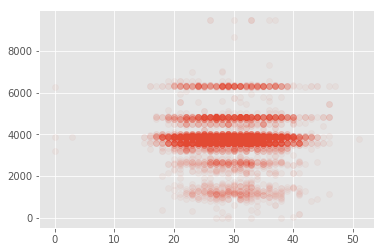

In [57]:
plt.scatter(additional_header_df['Member_Age_Years'], additional_header_df['Charge_Amt'], alpha=0.05)

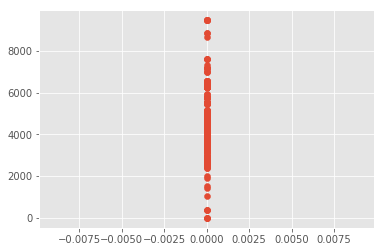

In [58]:
x = additional_header_df.inpatient_hospital
y = additional_header_df.Charged_Amt_Total

fig, ax = plt.subplots()
ax.scatter(x, y)

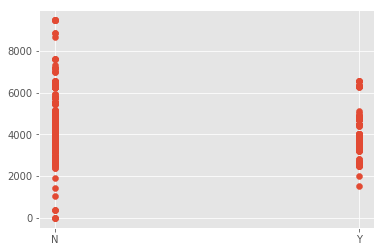

In [59]:
x = additional_header_df.Capitation_Flag
y = additional_header_df.Charged_Amt_Total

fig, ax = plt.subplots()
ax.scatter(x, y)

Text(0, 0.5, 'Number of Procedures')

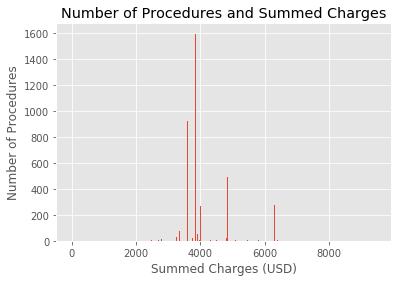

In [92]:
fig, ax = plt.subplots()
_ = ax.hist(additional_header_df.Charged_Amt_Total, bins=1000)
_ = ax.set_title("Number of Procedures and Summed Charges")
ax.set_xlabel("Summed Charges (USD)")
ax.set_ylabel("Number of Procedures")

In [83]:
additional_header_df.Charged_Amt_Total[(additional_header_df.Charged_Amt_Total > 6000 )
                                        & (additional_header_df.Charged_Amt_Total < 6500)]

140095735    6308.0
140148389    6308.0
140227711    6308.0
140471091    6308.0
140570239    6308.0
140902244    6308.0
141166117    6422.0
141309642    6308.0
141467228    6308.0
142022667    6308.0
142403508    6308.0
142722001    6255.0
145247426    6355.0
148240754    6308.0
148297721    6308.0
148304443    6308.0
148322173    6308.0
148402725    6308.0
148409005    6308.0
148434699    6308.0
148445910    6308.0
148458031    6308.0
148492066    6308.0
155073509    6308.0
155114318    6308.0
155530265    6308.0
155671497    6308.0
155673508    6308.0
155678680    6308.0
155682406    6308.0
              ...  
340467380    6308.0
340470490    6308.0
340475808    6308.0
340476984    6308.0
340483649    6308.0
340485796    6308.0
340486295    6308.0
340491729    6308.0
340491731    6308.0
340492608    6355.0
340495409    6308.0
340496899    6308.0
340504346    6308.0
340598492    6308.0
340601979    6308.0
340602472    6308.0
340602509    6308.0
340602600    6308.0
340602628    6308.0


Text(0, 0.5, 'Amount Charged (USD)')

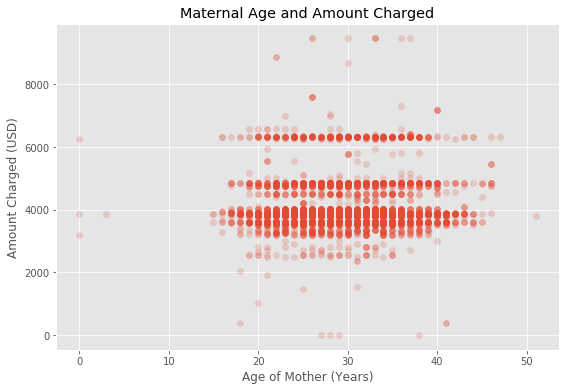

In [93]:
x = additional_header_df.Member_Age_Years
y = additional_header_df.Charged_Amt_Total

fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(x, y, alpha=0.2)
ax.set_title("Maternal Age and Amount Charged")
ax.set_xlabel("Age of Mother (Years)")
ax.set_ylabel("Amount Charged (USD)")

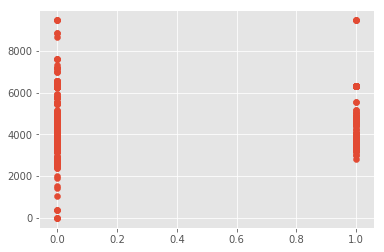

In [90]:
x = additional_header_df.large_city
y = additional_header_df.Charged_Amt_Total

fig, ax = plt.subplots()
ax.scatter(x, y)

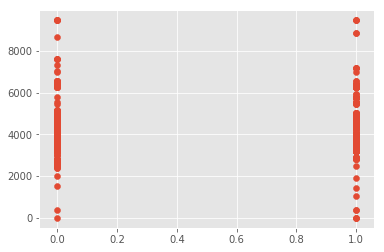

In [62]:
x = additional_header_df.small_city
y = additional_header_df.Charged_Amt_Total

fig, ax = plt.subplots()
ax.scatter(x, y)

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = additional_header_df.loc[:, ['Prepaid_or_not', 'Deductible_or_Not', 'Copay_or_not',
       'Capitation_Flag_Binary', 'is_weekend', 'inpatient_hospital',
       'Member_Age_Years', 'small_city', 'rural',
       'large_city']] #iloc for taking the columns you want by index; loc for taking columns by label
y = additional_header_df.loc[:, 'Charged_Amt_Total']

X_train, X_test, y_train, y_test = train_test_split(X, y)
# Train the model using the training sets

# Create linear regression object
regr = LinearRegression()

regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [-7.92846412e+01  6.10277227e+01  2.43613722e+01 -2.58810634e+02
 -2.02632694e+01  1.42108547e-14  3.31414114e+00 -4.62946452e+01
 -7.71838395e+01  2.77971785e+01]
Mean squared error: 542349.58
Variance score: 0.00


In [64]:
list(zip(X.columns, regr.coef_))

[('Prepaid_or_not', -79.28464117961745),
 ('Deductible_or_Not', 61.02772272010384),
 ('Copay_or_not', 24.361372245848916),
 ('Capitation_Flag_Binary', -258.81063379079603),
 ('is_weekend', -20.26326942706513),
 ('inpatient_hospital', 1.4210854715202004e-14),
 ('Member_Age_Years', 3.3141411363109228),
 ('small_city', -46.29464516357559),
 ('rural', -77.18383945848933),
 ('large_city', 27.797178517904186)]

In [65]:
X = additional_header_df.iloc[:, -3:] #iloc for taking the columns you want
y = additional_header_df.loc[:, 'Charged_Amt_Total']

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))



Coefficients: 
 [ -2.77380731  49.69210395 -50.65758004]
Mean squared error: 659114.71
Variance score: 0.00


In [66]:
list(zip(X.columns, regr.coef_))

[('small_city', -2.7738073101510827),
 ('large_city', 49.69210394662019),
 ('rural', -50.65758004256909)]

In [67]:
# X = simplified2_df.loc[:, ['Place_of_Service_Cd', 'Capitation_Flag_Binary', 'Copay_or_not', 'is_weekend', 'Prepaid_or_not']] #loc for labels
# y = simplified2_df.loc[:, 'Charged_Amt_Total']
# X_train, X_test, y_train, y_test = train_test_split(X, y)

# # Create linear regression object
# regr = LinearRegression()

# # Train the model using the training sets
# regr.fit(X_train, y_train)

# # Make predictions using the testing set
# y_pred = regr.predict(X_test)

# # The coefficients
# print('Coefficients: \n', regr.coef_)
# # The mean squared error
# print("Mean squared error: %.2f"
#       % mean_squared_error(y_test, y_pred))
# # Explained variance score: 1 is perfect prediction
# print('Variance score: %.2f' % r2_score(y_test, y_pred))

In [68]:
# list(zip(X.columns, regr.coef_))

## Random Forest
From the Linear Regression modeling it looks like there's some correlations, however, the relationships between those correlations is complex and the predictive capabilities of the model aren't very good

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [70]:
X = additional_header_df.loc[:, ['Prepaid_or_not', 'Deductible_or_Not', 'Copay_or_not',
       'Capitation_Flag_Binary', 'is_weekend', 'inpatient_hospital',
       'Member_Age_Years', 'small_city', 'rural',
       'large_city']] 
y = additional_header_df.loc[:, 'Charged_Amt_Total']

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Create random forest object
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model using the training sets
rf.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = rf.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))






Mean squared error: 681209.40
Variance score: -0.05


In [71]:
# X = simplified2_df.iloc[:, -4:] #iloc for taking the columns you want
# y = simplified2_df.loc[:, 'Charged_Amt_Total']

# X_train, X_test, y_train, y_test = train_test_split(X, y)

# # Create random forest object
# rf = RandomForestRegressor(n_estimators = 250, random_state = 42)

# # Train the model using the training sets
# rf.fit(X_train, y_train)

# # Make predictions using the testing set
# y_pred = rf.predict(X_test)

# # The mean squared error
# print("Mean squared error: %.2f"
#       % mean_squared_error(y_test, y_pred))
# # Explained variance score: 1 is perfect prediction
# print('Variance score: %.2f' % r2_score(y_test, y_pred))

## Gradient Boosting Regressor

In [72]:
from sklearn.ensemble import GradientBoostingRegressor

In [73]:
X = additional_header_df.loc[:, ['Prepaid_or_not', 'Deductible_or_Not', 'Copay_or_not',
       'Capitation_Flag_Binary', 'is_weekend', 'inpatient_hospital',
       'Member_Age_Years', 'small_city', 'rural',
       'large_city']] 
y = additional_header_df.loc[:, 'Charged_Amt_Total']
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Create random forest object
gbr = GradientBoostingRegressor(n_estimators = 250, random_state = 42)

# Train the model using the training sets
gbr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = gbr.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 521342.63
Variance score: 0.00


In [74]:
#rmse - average size of residuals

In [78]:
((y_test-y_test.mean()) ** 2).mean() ** 0.5

723.5970623720325

In [77]:
((y_test - y_pred)** 2).mean() ** 0.5

722.0406005808721

In [79]:
521342.63 ** 0.5

722.0406013514753